**MNIST NUMPY NETWORK** <br>
Imports and data preprocessing

In [68]:
import numpy as np
import idx2numpy
import tqdm as tq


In [69]:

train_images = idx2numpy.convert_from_file(r"C:\Users\posei\Desktop\Labs\LAB1\MNIST_DATA\train-images.idx3-ubyte")
train_labels = idx2numpy.convert_from_file(r"C:\Users\posei\Desktop\Labs\LAB1\MNIST_DATA\train-labels.idx1-ubyte")
test_images = idx2numpy.convert_from_file(r"C:\Users\posei\Desktop\Labs\LAB1\MNIST_DATA\t10k-images.idx3-ubyte")
test_labels = idx2numpy.convert_from_file(r"C:\Users\posei\Desktop\Labs\LAB1\MNIST_DATA\t10k-labels.idx1-ubyte")

In [70]:
train_images.shape

(60000, 28, 28)

**CONSTANTS**

In [71]:
# SETTINGS
BATCH_SIZE = 64
EPOCHS = 20
HIDDEN_NEURONS = 300
LEARNING_RATE = 0.1
SYSTYPE=np.float32

**ACTIVATIONS**

In [72]:
# ACTIVATIONS
class Sigmoid:
    '''
    Sigmoid activation function forward pass and backward pass
    '''
    def __init__(self):
        self.X = None
        
    def forward(self,  X ):
        self.X=X
        return(1 / (1 + np.exp(-1 * X)))
    
    def backward(self, dA):
        sig = 1.0 / (1.0 + np.exp( -self.X))
        return dA * sig * (1.0 - sig)

class ReLu:
    '''
    ReLu activation function forward pass and backward pass
    '''
    def __init__(self):
        self.X = None
    
    def forward(self, X):
        self.X = X.copy()
        X=np.maximum(0,X)
        return(X)
    
    def backward(self, dA):
        dX = np.array(dA, copy=True)
        dX[self.X <= 0.0] = 0.0
        return dX
    
class SoftMax():
    '''Class probability distribution, sums up to 1'''
    def __init__(self):
        self.X = None
        
    def forward(self, X):
        X_shift = X - np.max(X, axis=0, keepdims=True)
        exp_x = np.exp(X_shift)
        return exp_x / np.sum(exp_x, axis=0, keepdims=True)
    
    def backward(self, X_passthrough):
        return X_passthrough
        

In [73]:
np.exp(0)

np.float64(1.0)

In [74]:
sigs=ReLu()

sigs.forward(np.array([1.0,-2.0,3.0]))

array([1., 0., 3.])

**LAYERS**

In [75]:

#LINEAR LAYER
        
class Linear_layer:
    
    ''' Forward: Z = Weights * X + bias
        Backward: dX = Wt * dZ
                  dW = dZ * Xt
                  db = sum ([dZ, batch])'''
                  
    def __init__(self, input_size, output_size, mode="uniform"):
        
        #---------------WEIGHTS INITIALIZATION---------------------
        if mode == "uniform":
            self.W = np.random.uniform(low=-0, 
                                high=1, 
                                size=(output_size, input_size)).astype(SYSTYPE)
        elif mode == "normal":
            self.W = np.random.normal(
                loc=0.0, 
                scale=0.01, 
                size=(output_size, input_size)
            ).astype(SYSTYPE)

        elif mode == "xavier_uniform":
            limit = np.sqrt(6 / (input_size + output_size))
            self.W = np.random.uniform(
                -limit, 
                limit, 
                size=(output_size, input_size)
            ).astype(SYSTYPE)

        elif mode == "xavier_normal":
            std = np.sqrt(2 / (input_size + output_size))
            self.W = np.random.normal(
                0.0, 
                std, 
                size=(output_size, input_size)
            ).astype(SYSTYPE)

        elif mode == "he_uniform":
            limit = np.sqrt(6 / input_size)
            self.W = np.random.uniform(
                -limit, 
                limit, 
                size=(output_size, input_size)
            ).astype(SYSTYPE)

        elif mode == "he_normal":
            std = np.sqrt(2 / input_size)
            self.W = np.random.normal(
                0.0, 
                std, 
                size=(output_size, input_size)
            ).astype(SYSTYPE)

        elif mode == "zeros":
            self.W = np.zeros((output_size, input_size), dtype=SYSTYPE)

        elif mode == "ones":
            self.W = np.ones((output_size, input_size), dtype=SYSTYPE)
        #---------------WEIGHTS INITIALIZATION END---------------------        
        
        self.input = None
        self.out = None
        self.bias = np.zeros((output_size, 1),dtype=SYSTYPE)
        
    def forward(self, input):
        self.input = input
        return self.W @ self.input + self.bias
    
    def backward(self, dZ):
        
        self.dW = (dZ @ self.input.T) 
        
        self.db = np.sum(dZ, axis=1, keepdims=True) 
        
        dX = self.W.T @ dZ
        
        return dX
    
    def step(self, lr):
        self.W -= lr * self.dW
        self.bias -= lr * self.db
        

class InputLayer:
    '''Digesting initial input without adding bias or weights'''
    
    def forward(self, X):
        return X



**SINGLE FORWARD TEST PASS**

In [76]:
'''#Data
X = train_images[:1].reshape(28*28, 1)
X = (X - 0) / (255 - 0)

#Init layers
input_layer = InputLayer()
linear1 = Linear_layer(28*28, HIDDEN_NEURONS)
relu = ReLu()
linear2 = Linear_layer(HIDDEN_NEURONS, 10)
softmax = SoftMax()

#Forward pass
out = input_layer.forward(X)
z1  = linear1.forward(out)
a1  = relu.forward(z1)

z2  = linear2.forward(a1)
a2  = softmax.forward(z2) 

#Output check
print(a2)
assert np.sum(a2) == 1'''

'#Data\nX = train_images[:1].reshape(28*28, 1)\nX = (X - 0) / (255 - 0)\n\n#Init layers\ninput_layer = InputLayer()\nlinear1 = Linear_layer(28*28, HIDDEN_NEURONS)\nrelu = ReLu()\nlinear2 = Linear_layer(HIDDEN_NEURONS, 10)\nsoftmax = SoftMax()\n\n#Forward pass\nout = input_layer.forward(X)\nz1  = linear1.forward(out)\na1  = relu.forward(z1)\n\nz2  = linear2.forward(a1)\na2  = softmax.forward(z2) \n\n#Output check\nprint(a2)\nassert np.sum(a2) == 1'

**LOSS FUNCTION**

In [77]:
#Loss
class CrossEntropy:
    
    def __init__(self, eps=1e-12):
        self.eps = eps
        self.Y = None      
        self.P = None        
        self.batch_size = None

    def forward(self, logits, y_true):
        self.Y = y_true
        self.batch_size = y_true.shape[1]

        softmax = SoftMax()
        self.P = softmax.forward(logits)

        P_safe = np.clip(self.P, self.eps, 1 - self.eps)

        loss = -np.sum(self.Y * np.log(P_safe)) / self.batch_size

        return loss

    def backward(self):
        """
        dZ = (P - Y) / batch
        """
        return (self.P - self.Y) / self.batch_size
    
    

In [ ]:
#Init layers
def fit(mode="uniform", silent = False):
    '''
    modes = [
        unifrom
        normal
        xavier_unidorm
        xavier_normal
        he_uniform
        he_normal
        zeros
        ones
    ]
    '''
    
    input_layer = InputLayer()
    linear1 = Linear_layer(28*28, HIDDEN_NEURONS, mode)
    relu = ReLu()
    linear2 = Linear_layer(HIDDEN_NEURONS, 10, mode)
    softmax = SoftMax()

    num_samples = train_images.shape[0]
    criterion = CrossEntropy()

    for epoch in range(EPOCHS):
        total_loss = 0.0
        correct = 0
        pb = tq.tqdm(range(0,num_samples,BATCH_SIZE), disable=silent)
        ids = np.random.permutation(num_samples)
        
        for i in pb:
            
            batch = min(BATCH_SIZE, train_images.shape[0] - i)
            batch_idx = ids[i:i+batch]
            
            X = train_images[batch_idx].reshape(batch, 28*28 ).astype(SYSTYPE)
            X = X.T.astype(SYSTYPE)   
            X = X / 255.0

            y_idx = train_labels[batch_idx]            
            Y = np.zeros((10, batch), dtype=SYSTYPE)
            for b in range(batch):
                Y[y_idx[b], b] = 1.0

            out = input_layer.forward(X)
            z1  = linear1.forward(out)
            a1  = relu.forward(z1)
            z2  = linear2.forward(a1)

            loss = criterion.forward(z2, Y)
            total_loss += loss

            probs = criterion.P             
            preds = np.argmax(probs, axis=0)     

            correct += np.sum(preds == y_idx)

            dZ2 = criterion.backward()           
            dA1 = linear2.backward(dZ2)        
            dZ1 = relu.backward(dA1)           
            _   = linear1.backward(dZ1)          

            linear2.step(LEARNING_RATE)
            linear1.step(LEARNING_RATE)

        avg_loss = total_loss / (train_images.shape[0] - BATCH_SIZE)
        acc = correct / num_samples
        if not silent:
            print(f"Epoch {epoch+1}/{EPOCHS} | loss = {avg_loss:.4f} | acc = {acc:.4f}")
        
    #-------------TEST SET------------------
    num_samples = test_images.shape[0]

    for epoch in range(1):
        correct = 0
        pb = tq.tqdm(range(0, num_samples, BATCH_SIZE), disable = silent)
        
        for i in pb:
            batch = min(BATCH_SIZE, test_images.shape[0] - i)
            X = test_images[i:i+batch].reshape(batch, 28*28 ).astype(SYSTYPE)
            X = X.T.astype(SYSTYPE)   
            X = X / 255.0

            y_idx = test_labels[i:i+batch]           
            Y = np.zeros((10, batch), dtype=SYSTYPE)
            for b in range(batch):
                Y[y_idx[b], b] = 1.0

            out = input_layer.forward(X)
            z1  = linear1.forward(out)
            a1  = relu.forward(z1)
            z2  = linear2.forward(a1)

            loss = criterion.forward(z2, Y)

            probs = criterion.P        
            preds = np.argmax(probs, axis=0)    

            correct += np.sum(preds == y_idx)
        acc = correct / num_samples
    if not silent: 
        print(f"Test set accuracy: {acc*100}%")
    return(acc)
    


fit( mode = "xavier_normal", silent = True)

np.float64(0.9805)

In [84]:
modes = [
    "uniform",
    "normal",
    "xavier_uniform",
    "xavier_normal",
    "he_uniform",
    "he_normal",
    "zeros",
    "ones"
]
acc = [] 
for mode in modes:
    acc.append(fit(mode, silent = True))
for mode in enumerate(modes):
    print(f"Accuracy with {mode[1]} initialization: {acc[mode[0]]*100}%")

Accuracy with uniform initialization: 83.66%
Accuracy with normal initialization: 98.06%
Accuracy with xavier_uniform initialization: 97.84%
Accuracy with xavier_normal initialization: 97.98%
Accuracy with he_uniform initialization: 98.15%
Accuracy with he_normal initialization: 98.09%
Accuracy with zeros initialization: 11.35%
Accuracy with ones initialization: 11.35%


**Display**

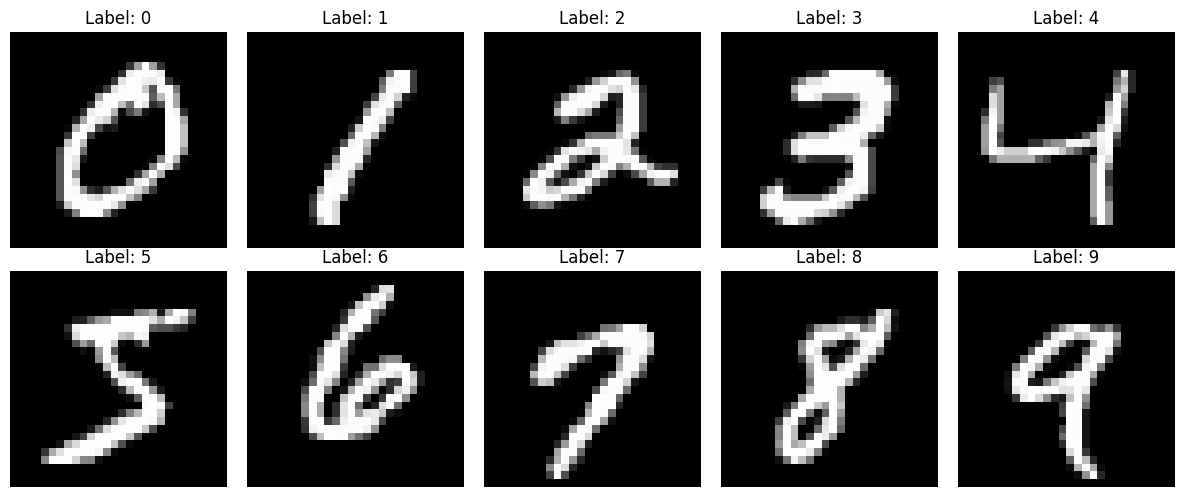

In [85]:
import matplotlib.pyplot as plt

selected_imgs = []
selected_labels = []
for cls in range(10):
        idx = np.where(train_labels == cls)[0][0]  
        selected_imgs.append(train_images[idx])
        selected_labels.append(cls)

plt.figure(figsize=(12, 5))

for i, (img, label) in enumerate(zip(selected_imgs, selected_labels)):
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()